<a href="https://colab.research.google.com/github/sanjeevhm/BDAProject/blob/binary_classification/Headphone_Dataset_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
pip install contractions

In [28]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)  # to view entire text in any column
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import string
import gzip
from pprint import pprint

from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
from nltk import FreqDist
#nltk.download('stopwords') # run this line only once
from nltk.corpus import stopwords
# from nltk.stem.wordnet import WordNetLemmatizer  # alternative lemmatizer
# lemma = WordNetLemmatizer()

import spacy



import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)  # suppressing deprecation warnings when running gensim LDA

# from specialmaps import HTML_MAP # for manual cleaning of HTML entities, not used
# from specialmaps import CONTRACTION_MAP
from collections import defaultdict
import contractions
# from contractions import CONTRACTION_MAP


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [29]:
headphone_df = pd.read_csv("https://raw.githubusercontent.com/sanjeevhm/BDAProject/binary_classification/Headphone_df.csv")

In [30]:
headphone_df.head()

,Unnamed: 0,Unnamed: 0.1,product_id,product_tite,star_rating,review_headline,review_body,review_date
0,46,46,B003EM6AQE,Panasonic ErgoFit In-Ear Earbud Headphone,5,Great In-Ear Headphones!,I LOVE THESE HEADPHONES! I am totally satisfied with the sound and the fact that they stay in my ears! They are great...and I love the color of course. :),2015-08-31
1,332,332,B003EM8008,Panasonic ErgoFit In-Ear Earbud Headphone,5,Good quality head phones!,"Probably the best earphones ever. Better than the Apple ones, I just wished that it had a mic on it, but these will last you a long time. Just ordered my second pair (since my first one got stolen) I had these for about 5 months and it still was in good condition before someone took it. Definitely would recommend and continue to repurchase these. Also, fast shipping too.",2015-08-31
2,367,367,B003EM6AOG,Panasonic ErgoFit In-Ear Earbud Headphone,5,Not bad at all!,"Great headphones, I mean they aren't going to blow your mind or anything, but they really work perfectly for the price you pay and for what they are .. these work so nicely for me when I'm trying to do some work and need outside sounds blocked out and I just want to hear the video I'm watching or the music I'm listening to.",2015-08-31
3,403,403,B00E4LGVUO,Panasonic ErgoFit In-Ear Earbud Headphone,5,Five Stars,I love them for their price and quality.,2015-08-31
4,567,567,B003EM8008,Panasonic ErgoFit In-Ear Earbud Headphone,5,I love these!,I love these earphones! They're very good for the price which is cheap.,2015-08-31


In [31]:
headphone_df = headphone_df.drop(['Unnamed: 0', 'Unnamed: 0.1'],axis=1)

In [32]:
headphone_df.head()

,product_id,product_tite,star_rating,review_headline,review_body,review_date
0,B003EM6AQE,Panasonic ErgoFit In-Ear Earbud Headphone,5,Great In-Ear Headphones!,I LOVE THESE HEADPHONES! I am totally satisfied with the sound and the fact that they stay in my ears! They are great...and I love the color of course. :),2015-08-31
1,B003EM8008,Panasonic ErgoFit In-Ear Earbud Headphone,5,Good quality head phones!,"Probably the best earphones ever. Better than the Apple ones, I just wished that it had a mic on it, but these will last you a long time. Just ordered my second pair (since my first one got stolen) I had these for about 5 months and it still was in good condition before someone took it. Definitely would recommend and continue to repurchase these. Also, fast shipping too.",2015-08-31
2,B003EM6AOG,Panasonic ErgoFit In-Ear Earbud Headphone,5,Not bad at all!,"Great headphones, I mean they aren't going to blow your mind or anything, but they really work perfectly for the price you pay and for what they are .. these work so nicely for me when I'm trying to do some work and need outside sounds blocked out and I just want to hear the video I'm watching or the music I'm listening to.",2015-08-31
3,B00E4LGVUO,Panasonic ErgoFit In-Ear Earbud Headphone,5,Five Stars,I love them for their price and quality.,2015-08-31
4,B003EM8008,Panasonic ErgoFit In-Ear Earbud Headphone,5,I love these!,I love these earphones! They're very good for the price which is cheap.,2015-08-31


In [33]:
# function to plot most frequent terms. This is used to gauge the quality of text processing
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top n most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

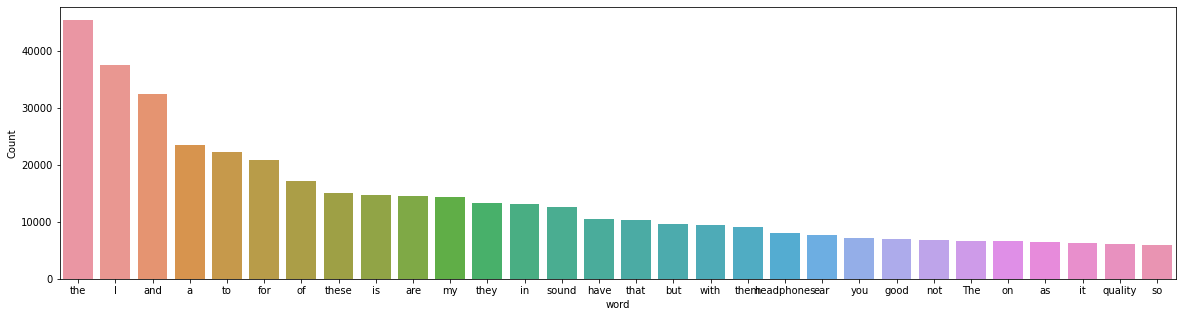

In [34]:
freq_words(list(headphone_df['review_body']))

In [35]:
def html_tag_remove(text):
    return BeautifulSoup(text, "html.parser").get_text()

def expand_contractions(text):    
    expanded_text = contractions.fix(text)
    return expanded_text

punc_char = set(string.punctuation)

def remove_punctuation(rev):
    return ''.join([ch for ch in rev if ch not in punc_char])

stop_words = stopwords.words('english')
stop_words.extend(['headset','bluetooth','headphone','headphones'])  

def remove_stopwords(rev):
    # rev is a review text, one string
    rev_new = " ".join([i for i in rev.split() if i not in stop_words])
    return rev_new

nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(rev): 
    # lemmatize input string rev, i.e. reduce all forms of a word to the lemma
    doc = nlp(" ".join(rev.split()))
    return " ".join([token.lemma_ for token in doc])

def lemmatization_tag(rev, tags = ['NOUN', 'ADJ']): # filter noun and adjective
    doc = nlp(" ".join(rev.split()))
    return " ".join([token.lemma_ for token in doc if token.pos_ in tags])

def remove_num(s):
    # s is a string, e.g. an entire review text
    return ''.join([i for i in s if not i.isdigit()])

In [36]:
headphone_df.loc[:,'review_no_html'] = headphone_df['review_body'].apply(html_tag_remove)
headphone_df.loc[:,'review_no_html'] = headphone_df['review_no_html'].apply(html_tag_remove)

In [37]:
headphone_df['review_no_html'].sample(5)

21239    I'll start off by saying that I HATE EARBUDS!! I have oddly shaped ears so I generally use actual headphones. However, as a college student, I needed something more versatile and less heavy, also something easy to put away and take out quick. So I bought earbuds.The Good:-The color. It's nice and pink, just as shown.-The sound--ish. They sound pretty good. Not amazing, but not horrible. (keep in mind you'll be paying under 10 bucks, not 50 so you can expect less than amazing quality)-They stay in the jack. My other headphones always slip from my phone jack. These haven't slipped ONCE, which is great.The Bad:-The odd shape that's supposed to go in your ear. Don't be fooled (like I was) the round clearish-gray bulb you see to the left of the pink back on the earbud IS NOT ROUND, it is oblong shaped. The clear plastic (oblong shaped) bulb comes off and they give you 2 other sizes (3 sizes. Large, medium, small) I'm using the small ones because I have oddly shaped ears. They don't

In [38]:

headphone_df.loc[:,'review_no_contraction'] = headphone_df['review_no_html'].apply(expand_contractions)
print(headphone_df['review_no_html'].sample(n=5, random_state = 0))
print("\n")
print(headphone_df['review_no_contraction'].sample(n=5, random_state = 0))

11911    I use these to listen to TV at night and work perfect. They stay in my ears where the pods did not.                                                                                  
20044    The sound is ok but at least they stay in my ears which is more than can be said for most ear buds.                                                                                  
10425    perfect                                                                                                                                                                              
8307     Use the for the gym; good sound quality for the price.                                                                                                                               
12307    Volume is a little low, but fidelity is high.  I use this to listen to audiobooks when on the street.The construction is very durable; the cable cover is wound and seems very tough.
Name: review_no_html, dtype: object


11911  

In [39]:
headphone_df.loc[:,'review_no_punc'] = [remove_punctuation(r) for r in headphone_df['review_no_contraction']]

In [40]:
headphone_df.loc[:,'review_no_stopwords'] = [remove_stopwords(r.lower()) for r in headphone_df['review_no_punc']]


In [41]:
print(headphone_df['review_body'].sample(n=5, random_state = 0),'\n')
print(headphone_df['review_no_punc'].sample(n=5, random_state = 0),'\n')
print(headphone_df['review_no_stopwords'].sample(n=5, random_state = 0),'\n')

11911    I use these to listen to TV at night and work perfect. They stay in my ears where the pods did not.                                                                                        
20044    The sound is ok but at least they stay in my ears which is more than can be said for most ear buds.                                                                                        
10425    perfect                                                                                                                                                                                    
8307     Use the for the gym; good sound quality for the price.                                                                                                                                     
12307    Volume is a little low, but fidelity is high.  I use this to listen to audiobooks when on the street.<br />The construction is very durable; the cable cover is wound and seems very tough.
Name: review_bo

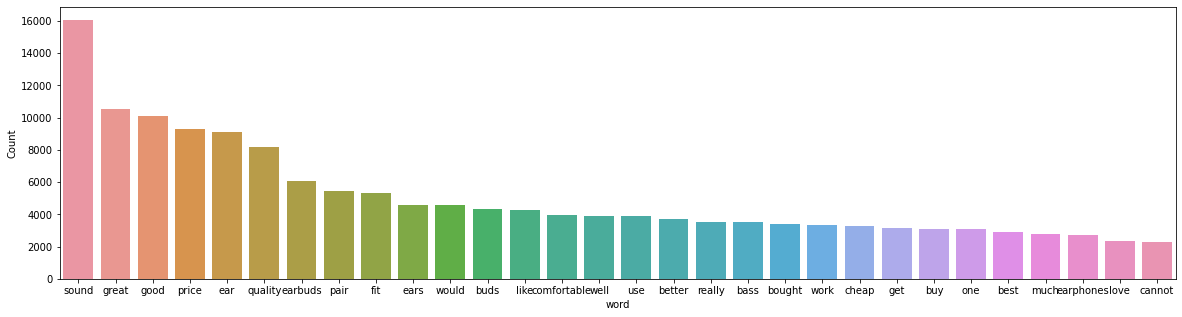

In [42]:
freq_words(headphone_df['review_no_stopwords'])

In [43]:
# lemmatize, this is a relatively slow preprocessing step 
headphone_df.loc[:,'review_lemmatized'] = headphone_df['review_no_stopwords'].apply(lemmatization)

In [44]:
# run remove stop words again because the lemmatization process generates more stop words
headphone_df.loc[:,'review_lemmatized'] = headphone_df['review_lemmatized'].apply(remove_stopwords)

In [45]:
# remove numbers
headphone_df.loc[:, 'review_lemmatized'] = headphone_df['review_lemmatized'].apply(remove_num)

In [46]:
print(headphone_df['review_body'].sample(n=3, random_state = 0),'\n')
print(headphone_df['review_no_stopwords'].sample(n=3, random_state = 0),'\n')
print(headphone_df['review_lemmatized'].sample(n=3, random_state = 0),'\n') 

11911    I use these to listen to TV at night and work perfect. They stay in my ears where the pods did not.
20044    The sound is ok but at least they stay in my ears which is more than can be said for most ear buds.
10425    perfect                                                                                            
Name: review_body, dtype: object 

11911    use listen tv night work perfect stay ears pods
20044    sound ok least stay ears said ear buds         
10425    perfect                                        
Name: review_no_stopwords, dtype: object 

11911    use listen tv night work perfect stay ear pod
20044    sound ok least stay ear say ear bud          
10425    perfect                                      
Name: review_lemmatized, dtype: object 



In [47]:
# PorterStemmer deals with cases like TVs, but produce incomplete workds like instal
from nltk.stem import PorterStemmer
porter = PorterStemmer()
print(porter.stem('installation'))
print(porter.stem('tvs'))

instal
tv


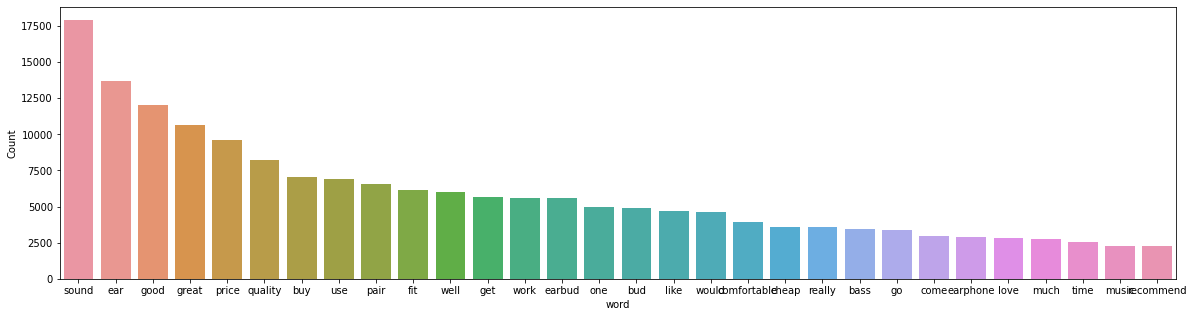

In [48]:
freq_words(headphone_df['review_lemmatized'])

In [49]:
headphone_df.columns

Index(['product_id', 'product_tite', 'star_rating', 'review_headline',
       'review_body', 'review_date', 'review_no_html', 'review_no_contraction',
       'review_no_punc', 'review_no_stopwords', 'review_lemmatized'],
      dtype='object')

In [50]:
headphone_df.head()

,product_id,product_tite,star_rating,review_headline,review_body,review_date,review_no_html,review_no_contraction,review_no_punc,review_no_stopwords,review_lemmatized
0,B003EM6AQE,Panasonic ErgoFit In-Ear Earbud Headphone,5,Great In-Ear Headphones!,I LOVE THESE HEADPHONES! I am totally satisfied with the sound and the fact that they stay in my ears! They are great...and I love the color of course. :),2015-08-31,I LOVE THESE HEADPHONES! I am totally satisfied with the sound and the fact that they stay in my ears! They are great...and I love the color of course. :),I LOVE THESE HEADPHONES! I am totally satisfied with the sound and the fact that they stay in my ears! They are great...and I love the color of course. :),I LOVE THESE HEADPHONES I am totally satisfied with the sound and the fact that they stay in my ears They are greatand I love the color of course,love totally satisfied sound fact stay ears greatand love color course,love totally satisfied sound fact stay ear greatand love color course
1,B003EM8008,Panasonic ErgoFit In-Ear Earbud Headphone,5,Good quality head phones!,"Probably the best earphones ever. Better than the Apple ones, I just wished that it had a mic on it, but these will last you a long time. Just ordered my second pair (since my first one got stolen) I had these for about 5 months and it still was in good condition before someone took it. Definitely would recommend and continue to repurchase these. Also, fast shipping too.",2015-08-31,"Probably the best earphones ever. Better than the Apple ones, I just wished that it had a mic on it, but these will last you a long time. Just ordered my second pair (since my first one got stolen) I had these for about 5 months and it still was in good condition before someone took it. Definitely would recommend and continue to repurchase these. Also, fast shipping too.","Probably the best earphones ever. Better than the Apple ones, I just wished that it had a mic on it, but these will last you a long time. Just ordered my second pair (since my first one got stolen) I had these for about 5 months and it still was in good condition before someone took it. Definitely would recommend and continue to repurchase these. Also, fast shipping too.",Probably the best earphones ever Better than the Apple ones I just wished that it had a mic on it but these will last you a long time Just ordered my second pair since my first one got stolen I had these for about 5 months and it still was in good condition before someone took it Definitely would recommend and continue to repurchase these Also fast shipping too,probably best earphones ever better apple ones wished mic last long time ordered second pair since first one got stolen 5 months still good condition someone took definitely would recommend continue repurchase also fast shipping,probably good earphone ever well apple one wish mic last long time order second pair since first one get steal month still good condition someone take definitely would recommend continue repurchase also fast shipping
2,B003EM6AOG,Panasonic ErgoFit In-Ear Earbud Headphone,5,Not bad at all!,"Great headphones, I mean they aren't going to blow your mind or anything, but they really work perfectly for the price you pay and for what they are .. these work so nicely for me when I'm trying to do some work and need outside sounds blocked out and I just want to hear the video I'm watching or the music I'm listening to.",2015-08-31,"Great headphones, I mean they aren't going to blow your mind or anything, but they really work perfectly for the price you pay and for what they are .. these work so nicely for me when I'm trying to do some work and need outside sounds blocked out and I just want to hear the video I'm watching or the music I'm listening to.","Great headphones, I mean they are not going to blow your mind or anything, but they really work perfectly for the price you pay and for what they are .. these work so nicely for me when I am trying to do some work a

In [51]:
headphone_df = headphone_df.drop(['review_no_html','review_no_contraction','review_no_punc','review_no_stopwords'],axis = 1)

In [52]:
headphone_df.to_csv('Headphone_df_processed_nlp.csv')